# 10.1 Hypotheses and Test Procedures
- **Hypothesis**:
A hypothesis is a claim or statement about the value of a single population characteristic or the values of several population characteristics. 
    - **Null Hypothesis**, denoted by $H_0$:
A claim about a population characteristic that is initially assumed to be true. 
    - **Alternative Hypothesis**, denoted by $H_a$
A competing claim about a population characteristic.

- **Test of hypothesis**:
A test of hypotheses is a method that uses sample data to decide between two competing claims (hypotheses) about a population characteristic.
1. In carrying out a test of $H_0$ versus $H_a$, the null hypothesis $H_0$  will be rejected in favor of $H_a$  only if the sample provides convincing evidence that $H_0$  is false.
2. If the sample does not provide such evidence, $H_0$  will not be rejected.
3. The two possible conclusions in a test of hypotheses are reject $H_0$  or fail to reject $H_0$.


## Steps in a Hypothesis Test
1. Describe the population characteristic of interest.
2. State the null hypothesis.
3. State the alternative hypothesis .
4. Select the significance level 𝛼 for the test.
5. Display the test statistic to be used, with substitution of the hypothesized value identified in Step 2.
6. Check to make sure that any assumptions required for the test are reasonable.
7. Calculate all quantities appearing in the test statistic and the value of the test statistic itself.
8. Determine the 𝑃-value associated with the observed value of the test statistic.
9. State the conclusion (which is reject $H_0$ if 𝑃-value≤𝛼 and fail to reject $H_0$  otherwise). The conclusion should then be stated in the context of the problem. The level of significance should be included when stating the conclusion.


# 10.2 Errors in Hypothesis Testing: Type I error and Type II error
- Type I error:
The error of rejecting $H_0$  when $H_0$  is true.
- Type II error:
The error of failing to rejecting $H_0$  when $H_0$  is false.

## probability of error
The probability of a Type I error: denoted by 𝛼, also called the **significance level** of the test. For example, a test with $\alpha = 0.01$ is said to have a significance level of 0.01. Because $\alpha$ represents the probability of rejecting a true null hypothesis, selecting a significance level $\alpha = 0.01$ results in a test procedure that, used over and over with different random samples, rejects a true $H_0$ about 1 times in 100.<br>
The probability of a Type II error: denoted by 𝛽.

An ideal test procedure would result in both $\alpha = 0$ and $\beta = 0$. However, if we must base our decision on incomplete information—a sample rather than a census—it is impossible to achieve this ideal. The standard test procedures allow us to control $\alpha$, but they provide no direct control over $\beta$. In general, there is a compromise between small $\alpha$ and small $\beta$. After assessing the consequences of Type I and Type II errors, identify the largest $\alpha$ that is acceptable. Then use a test procedure with this maximum acceptable value as the level of significance (because using a smaller $\alpha$ increases $\beta$).

# 10.3 Large-Sample Hypothesis Tests for a Population Proportion
Recall that 
- $\mu_{\hat{p}}=𝑝$
- $\sigma_{\hat{p}}= \sqrt{(𝑝(1−𝑝)/𝑛)}$

This formula is exact if the population is infinite and is approximately correct if the population is finite and no more than 10% of the population is included in the sample. A conservative rule of thumb is that if both $𝑛𝑝 \ge 10$ and $𝑛(1−𝑝) \ge 10$.
- When 𝑛 is sufficiently large and 𝑝 is not too near 0 or 1, the sampling distribution of $\hat{p}$ is well approximated by a normal curve.|

## Standard 𝑧 variable
The standardized variable
$$𝑧 = \frac{\hat{p}-p}{\sqrt{(𝑝(1−𝑝)/𝑛)}}$$
has a standard normal distribution.

## P-value
- **Test statistic**:  A value calculated using sample data. It is the value used to make the decision to reject or fail to reject $H_0$.
- **P-value**:  A measure of inconsistency between the hypothesized value for a population characteristic and the observed sample. It is the probability, assuming that $H_0$ is true, of obtaining a test statistic value at least as inconsistent with $𝐻_0$ as what was observed. The P-value is also sometimes called the **observed significance level**.

A decision to reject or to fail to reject $H_0$ results from comparing the P-value to the chosen significance level $\alpha$:
- Reject $H_0$ if P-value $\le a$.
- Fail to reject $H_0$ if P-value $> a$.

## Determination of the P-Value When the Test Statistic Is z
1. Upper-tailed test: $H_a$: p $>$ hypothesized value. P-value is the area in the upper tail of the z-value corresponding to the hypothesized value.
2. Lower-tailed test: $H_a$: p $<$ hypothesized value. P-value is the area in the lower tail of the z-value corresponding to the hypothesized value.
3. Two-tailed test: $H_a$: p $\ne$ hypothesized value. P-value is the sum of the area in two tails.

## Example
$H_0$: p = 0.5 <br>
$H_a$: p > 0.5 <br>
Significance level: $\alpha = 0.05$

### Getting samples

<Axes: title={'center': 'Histogram of samples'}, ylabel='Count'>

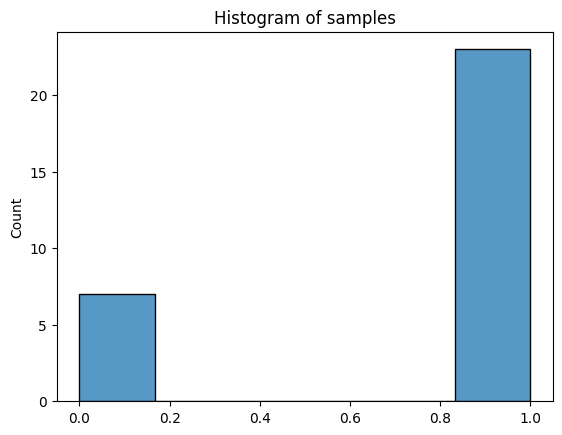

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean,pstdev

# Set up true p
true_p = 0.7

# Population is of size 1000, randomly generated 
np.random.seed(seed=42) # fix the random seed
population = np.random.choice(a=[0,1],size=1000,replace=True,p=[1-true_p,true_p]).astype(float)

# set the number of samples collected
n_samples = 30

# collect samples
samples = np.random.choice(population,n_samples,replace=True)
sample_proportion = sum(samples)/len(samples)
# plot
plt.title("Histogram of samples")
sns.histplot(samples)

### Calculate p-value and conduct hypothesis test

In [2]:
from math import sqrt
from scipy.stats import norm

# set H_0 p and significance level alpah
p = 0.5
alpha = 0.05

# Calculate z-score
std = sqrt((p*(1-p))/n_samples)
print(f"Sample proportion is: {sample_proportion}")
z = (sample_proportion - p)/std
print(f"Z-score is: {z}")

# Calculate P-value
p_val = norm.sf(z) # sf stands for Survival function: sf(z) is defined by 1 - P(X<z)
print("-"*20)
print(f"Null hypothesis H_0: p = {p}.")
print(f"P value is: {p_val}. Significance level is {alpha}.")
if p_val < alpha:
    print("We reject the hypothesis.")
else:
    print("We fail to reject the hypothesis.")

Sample proportion is: 0.7666666666666667
Z-score is: 2.9211869733608866
--------------------
Null hypothesis H_0: p = 0.5.
P value is: 0.0017435024460706872. Significance level is 0.05.
We reject the hypothesis.


# 10.4 Hypothesis Tests for a Population Mean
Recall that if 𝑛 is large ($𝑛 \ge 30)$ or the population distribution is normal, the standardized variable 
$$z = \frac{\bar{x} - \mu_{\bar{x}}}{\sigma_{\bar{x}}}  = \frac{\bar{x} - \mu_{\bar{x}}}{\sigma / \sqrt{n}}$$ 
has approximately a standard normal 𝑧 distribution.

1. If $\sigma$ is known, then we can calculate P-value and proceed similarly to the hypothesis test for a population proportion.
2. If $\sigma$ is unknown, when n is large or the population distribution is approximately normal then 
$$𝑡= \frac{\bar{x} - \mu}{𝑠/\sqrt{n}}$$
has approximately a t distribution with df = n-1. P-value in this case is calculated as the area under the t curve.

## Example (Ex10.14)
- $\mu$: mean daily wasted time for employees of this company
- $H_0$: $\mu = 120$
- $H_a$: $\mu < 120$
- Significan level $\alpha = 0.05$

In [3]:
import statsmodels.graphics.gofplots as sm
import pandas as pd
url = "https://github.com/cocoxhuang/STAT213/blob/main/Ex10.14.csv?raw=true"
data = pd.read_csv(url)
data

,Time wasted (min)
0,108
1,112
2,117
3,130
4,111
5,131
6,113
7,113
8,105
9,128


### Normality test

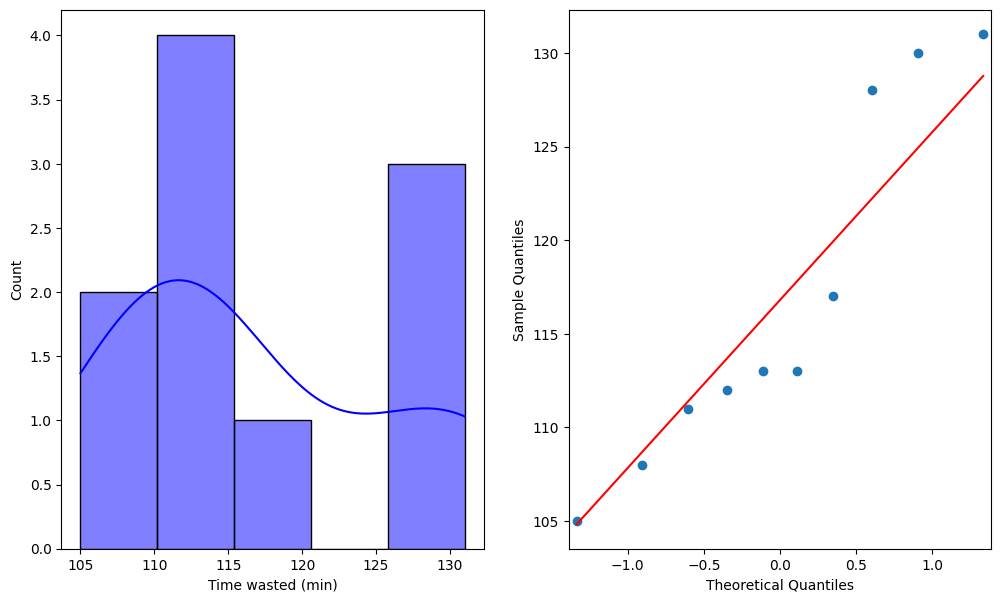

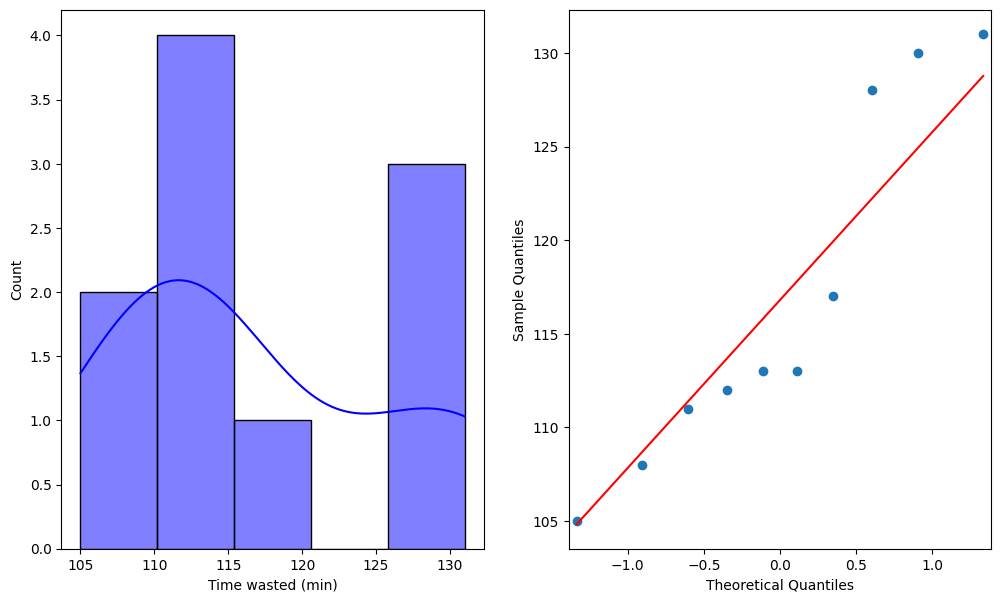

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# Histogram with normal curve for comparison
sns.histplot(data['Time wasted (min)'],kde=True, color ='blue',ax=ax[0]) 
# Normal probability plot
sm.ProbPlot(data['Time wasted (min)']).qqplot(line='s', ax=ax[1])

### P-value

In [5]:
from statistics import stdev, mean
from scipy.stats import t

# set H_0 p and significance level alpah
mu = 120
alpha = 0.05

# Calculate z-score
samples = data['Time wasted (min)']
n = len(samples)
std = stdev(samples)/sqrt(n)
x_bar = mean(samples)
print(f"Sample mean is: {x_bar}")
t_score = (x_bar - mu)/std
print(f"t-score is: {t_score}")

# Calculate P-value
p_val = t.cdf(t_score,df = n-1) # sf stands for Survival function: sf(t) is defined by 1 - P(X<t)
print("-"*20)
print(f"Null hypothesis H_0: mu = {mu}.")
print(f"P value is: {p_val}. Significance level is {alpha}.")
if p_val < alpha:
    print("We reject the hypothesis.")
else:
    print("We fail to reject the hypothesis.")

Sample mean is: 116.8
t-score is: -1.0709057958075854
--------------------
Null hypothesis H_0: mu = 120.
P value is: 0.15604432057125805. Significance level is 0.05.
We fail to reject the hypothesis.


# 10.5 Power and Probability of Type II Error
- **Power of a test**: The probability of rejecting the null hypothesis.
- Effect of  Various Factors on the Power of a Test:
    - The larger the size of the difference between the hypothesized value and the actual value of the population characteristic, the greater the power.
    - The larger the significance level, 𝛼, the greater the power of the test.
    - The larger the sample size, the greater the power of the test.
    
When $H_0$ is false, power=1−𝛽.